In [18]:
pip install causalgraphicalmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [19]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

from causalgraphicalmodels import StructuralCausalModel
from causalgraphicalmodels.csm import discrete_model, linear_model
import math
import itertools
np.random.seed(10)

# Excercise:

Check dependencies and independencies for chains, forks and inverted forks using the property of joint probability factorization for independent variables: 

if $A$ and $B$ are independent, then $P(A,B) = P(A) P(B)$

Check independence for all values of the variables.

## Chain

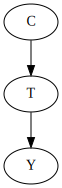

In [20]:
fd0 = StructuralCausalModel({
    "C": lambda n_samples: np.random.binomial(n=1, p=0.5, size=n_samples),
    "T": discrete_model(["C"], {(0,): (0.1, 0.9), (1,): (0.8, 0.2)}),
    "Y": discrete_model(["T"], {(0,): (0.3, 0.7), (1,): (0.6, 0.4),}),
})

fd0.cgm.draw()

In [21]:
data_df = fd0.sample(n_samples=1000000)
data_df.head()

,C,T,Y
0,1,1.0,1.0
1,0,1.0,1.0
2,1,0.0,1.0
3,1,0.0,1.0
4,0,1.0,1.0


### with conditioning

$P(X_1, X_3 | X_2) = P(X_1 | X_2) * P(X_3 | X_2)$

$X_1 = C, X_2 = T, X_3 = Y$

$P(C, Y | T) = P(C | T) * P(Y | T)$ 

In order to iterate over values {0,1} for all random variables {C, T, Y}, I defined three iterators {i, j, k} correspondingly to examine all possible. Same approach is used in subsequent exercises.

We ensure that when conditioned on $T$, $C$ and $Y$ are independent.
 

In [22]:
probs = {}
# i --> C, 0
# j --> T, 1
# k --> Y, 2

## calculate probabilites for all possible combinations
for i, j, k in itertools.product([0,1], [0,1], [0,1]):
  probs["P_C_{0}_Y_{2}_cond_T_{1}".format(i, j, k)] = len(data_df[(data_df['C'] == i) & (data_df['Y'] == k) & (data_df['T'] == j) ])/ len(data_df[(data_df['T'] == j)])
  probs["p_C_{0}_cond_T_{1}".format(i, j)] = len(data_df[(data_df['T'] == j) & (data_df['C'] == i)]) / len(data_df[data_df['T'] == j])
  probs["p_Y_{1}_cond_T_{0}".format(j, k)] = len(data_df[(data_df['Y'] == k) & (data_df['T'] == j)]) / len(data_df[data_df['T'] == j])

## report values and verify equality

for i, j, k in itertools.product([0,1], [0,1], [0,1]):
  print("(C, T, Y) = ({0}, {1}, {2})".format(i, j, k))
  idx1 = "P_C_{0}_Y_{2}_cond_T_{1}".format(i, j, k)
  idx2 = "p_C_{0}_cond_T_{1}".format(i, j)
  idx3 = "p_Y_{1}_cond_T_{0}".format(j, k)
  print('P(C = {0}, Y = {2} | T = {1}) = {3}'.format(i, j, k, probs[idx1]))
  print('P(C = {0} | T = {1}) = {2}'.format(i, j, probs[idx2]))
  print('P(Y = {1} | T = {0}) = {2}'.format(j, k, probs[idx3]))
  print("P(C = {0} | T = {1}) * P(Y = {2} | T = {1}) = {3}".format(i, j, k, probs[idx2] * probs[idx3]))
  print("Equality Holds: {0}".format(math.isclose(probs[idx1], probs[idx2] * probs[idx3], rel_tol=1e-2)))
  print("\n")

(C, T, Y) = (0, 0, 0)
P(C = 0, Y = 0 | T = 0) = 0.03300031754561665
P(C = 0 | T = 0) = 0.11110099505028546
P(Y = 0 | T = 0) = 0.3000472987526897
P(C = 0 | T = 0) * P(Y = 0 | T = 0) = 0.033335553453574106
Equality Holds: False


(C, T, Y) = (0, 0, 1)
P(C = 0, Y = 1 | T = 0) = 0.07810067750466881
P(C = 0 | T = 0) = 0.11110099505028546
P(Y = 1 | T = 0) = 0.6999527012473103
P(C = 0 | T = 0) * P(Y = 1 | T = 0) = 0.07776544159671137
Equality Holds: True


(C, T, Y) = (0, 1, 0)
P(C = 0, Y = 0 | T = 1) = 0.48996945445548334
P(C = 0 | T = 1) = 0.8173743930460221
P(Y = 0 | T = 1) = 0.5992784774892618
P(C = 0 | T = 1) * P(Y = 0 | T = 1) = 0.48983488180332957
Equality Holds: True


(C, T, Y) = (0, 1, 1)
P(C = 0, Y = 1 | T = 1) = 0.3274049385905387
P(C = 0 | T = 1) = 0.8173743930460221
P(Y = 1 | T = 1) = 0.4007215225107382
P(C = 0 | T = 1) * P(Y = 1 | T = 1) = 0.32753951124269254
Equality Holds: True


(C, T, Y) = (1, 0, 0)
P(C = 1, Y = 0 | T = 0) = 0.26704698120707304
P(C = 1 | T = 0) = 0.88889900

### without conditioning

$P(X_1, X_3) = P(X_1) * P(X_3)$

$X_1 = C, X_2 = T, X_3 = Y$

$P(C, Y) = P(C) * P(Y)$ 

In [23]:
probs = {}
# i --> C, 0
# j --> T, 1
# k --> Y, 2

## calculate probabilites for all possible combinations
for i, k in itertools.product([0,1], [0,1]):
  probs["P_C_{0}_Y_{1}".format(i, k, k)] = len(data_df[(data_df['C'] == i) & (data_df['Y'] == k)]) / len(data_df)
  probs["p_C_{0}".format(i)] = len(data_df[(data_df['C'] == i)]) / len(data_df)
  probs["p_Y_{0}".format(k)] = len(data_df[(data_df['Y'] == k)]) / len(data_df)

## report values and verify equality
for i, k in itertools.product([0,1], [0,1]):
  print("(C , Y) = ({0}, {1})".format(i, k))
  idx1 = "P_C_{0}_Y_{1}".format(i , k)
  idx2 = "p_C_{0}".format(i)
  idx3 = "p_Y_{0}".format(k)
  print('P(C = {0}, Y = {1}) = {2}'.format(i, k, probs[idx1]))
  print('P(C = {0}) = {1}'.format(i, probs[idx2]))
  print('P(Y = {0}) = {1}'.format(k, probs[idx3]))
  print("P(C = {0}) * P(Y = {1}) = {2}".format(i, k, probs[idx2] * probs[idx3]))
  print("Equality Holds: {0}".format(math.isclose(probs[idx1], probs[idx2] * probs[idx3], rel_tol=1e-2)))
  print("\n")

(C , Y) = (0, 0)
P(C = 0, Y = 0) = 0.284183
P(C = 0) = 0.499319
P(Y = 0) = 0.464526
P(C = 0) * P(Y = 0) = 0.231946657794
Equality Holds: False


(C , Y) = (0, 1)
P(C = 0, Y = 1) = 0.215136
P(C = 0) = 0.499319
P(Y = 1) = 0.535474
P(C = 0) * P(Y = 1) = 0.26737234220600004
Equality Holds: False


(C , Y) = (1, 0)
P(C = 1, Y = 0) = 0.180343
P(C = 1) = 0.500681
P(Y = 0) = 0.464526
P(C = 1) * P(Y = 0) = 0.23257934220600002
Equality Holds: False


(C , Y) = (1, 1)
P(C = 1, Y = 1) = 0.320338
P(C = 1) = 0.500681
P(Y = 1) = 0.535474
P(C = 1) * P(Y = 1) = 0.268101657794
Equality Holds: False




Only with conditioning on $X_2$, $X_1$ and $X_3 are independent.

## Fork

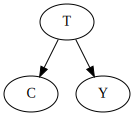

In [24]:
fd0 = StructuralCausalModel({
    "T": lambda n_samples: np.random.binomial(n=1, p=0.3, size=n_samples),
    "C": discrete_model(["T"], {(0,): (0.1,0.9), (1,): (0.8,0.2)}),
    "Y": discrete_model(["T"], {(0,): (0.3, 0.7), (1,): (0.6, 0.4),}),
})

fd0.cgm.draw()

In [25]:
data_df = fd0.sample(n_samples=1000000)
data_df.head()

,T,C,Y
0,1,0.0,0.0
1,0,1.0,1.0
2,1,0.0,0.0
3,0,1.0,1.0
4,0,1.0,1.0


### with conditioning

$P(X_1, X_3 | X_2) = P(X_1 | X_2) * P(X_3 | X_2)$

$X_1 = C, X_2 = T, X_3 = T$

$P(C, Y | T) = P(C | T) * P(Y | T)$

In [26]:
probs = {}
# i --> C, 0
# j --> T, 1
# k --> Y, 2

## calculate probabilites for all possible combinations
for i, j, k in itertools.product([0,1], [0,1], [0,1]):
  probs["P_C_{0}_Y_{2}_cond_T_{1}".format(i, j, k)] = len(data_df[(data_df['C'] == i) & (data_df['Y'] == k) & (data_df['T'] == j) ])/ len(data_df[(data_df['T'] == j)])
  probs["p_C_{0}_cond_T_{1}".format(i, j)] = len(data_df[(data_df['T'] == j) & (data_df['C'] == i)]) / len(data_df[data_df['T'] == j])
  probs["p_Y_{1}_cond_T_{0}".format(j, k)] = len(data_df[(data_df['Y'] == k) & (data_df['T'] == j)]) / len(data_df[data_df['T'] == j])

## report values and verify equality

for i, j, k in itertools.product([0,1], [0,1], [0,1]):
  print("(C, T, Y) = ({0}, {1}, {2})".format(i, j, k))
  idx1 = "P_C_{0}_Y_{2}_cond_T_{1}".format(i, j, k)
  idx2 = "p_C_{0}_cond_T_{1}".format(i, j)
  idx3 = "p_Y_{1}_cond_T_{0}".format(j, k)
  print('P(C = {0}, Y = {2} | T = {1}) = {3}'.format(i, j, k, probs[idx1]))
  print('P(C = {0} | T = {1}) = {2}'.format(i, j, probs[idx2]))
  print('P(Y = {1} | T = {0}) = {2}'.format(j, k, probs[idx3]))
  print("P(C = {0} | T = {1}) * P(Y = {2} | T = {1}) = {3}".format(i, j, k, probs[idx2] * probs[idx3]))
  print("Equality Holds: {0}".format(math.isclose(probs[idx1], probs[idx2] * probs[idx3], rel_tol=1e-2)))
  print("\n")

(C, T, Y) = (0, 0, 0)
P(C = 0, Y = 0 | T = 0) = 0.029544356556217177
P(C = 0 | T = 0) = 0.0992916215234997
P(Y = 0 | T = 0) = 0.2987753456846944
P(C = 0 | T = 0) * P(Y = 0 | T = 0) = 0.029665888544277465
Equality Holds: True


(C, T, Y) = (0, 0, 1)
P(C = 0, Y = 1 | T = 0) = 0.06974726496728252
P(C = 0 | T = 0) = 0.0992916215234997
P(Y = 1 | T = 0) = 0.7012246543153056
P(C = 0 | T = 0) * P(Y = 1 | T = 0) = 0.06962573297922223
Equality Holds: True


(C, T, Y) = (0, 1, 0)
P(C = 0, Y = 0 | T = 1) = 0.4801613987895091
P(C = 0 | T = 1) = 0.7998062415521983
P(Y = 0 | T = 1) = 0.6010107399442028
P(C = 0 | T = 1) * P(Y = 0 | T = 1) = 0.48069214104727853
Equality Holds: True


(C, T, Y) = (0, 1, 1)
P(C = 0, Y = 1 | T = 1) = 0.3196448427626892
P(C = 0 | T = 1) = 0.7998062415521983
P(Y = 1 | T = 1) = 0.3989892600557971
P(C = 0 | T = 1) * P(Y = 1 | T = 1) = 0.31911410050491973
Equality Holds: True


(C, T, Y) = (1, 0, 0)
P(C = 1, Y = 0 | T = 0) = 0.2692309891284772
P(C = 1 | T = 0) = 0.900708378476

### without conditioning

$P(X_1, X_3) = P(X_1) * P(X_3)$

$X_1 = C, X_2 = T, X_3 = Y$

$P(C, Y) = P(C) * P(Y)$ 

In [27]:
probs = {}
# i --> C, 0
# j --> T, 1
# k --> Y, 2

## calculate probabilites for all possible combinations
for i, k in itertools.product([0,1], [0,1]):
  probs["P_C_{0}_Y_{1}".format(i, k, k)] = len(data_df[(data_df['C'] == i) & (data_df['Y'] == k)]) / len(data_df)
  probs["p_C_{0}".format(i)] = len(data_df[(data_df['C'] == i)]) / len(data_df)
  probs["p_Y_{0}".format(k)] = len(data_df[(data_df['Y'] == k)]) / len(data_df)

## report values and verify equality
for i, k in itertools.product([0,1], [0,1]):
  print("(C , Y) = ({0}, {1})".format(i, k))
  idx1 = "P_C_{0}_Y_{1}".format(i , k)
  idx2 = "p_C_{0}".format(i)
  idx3 = "p_Y_{0}".format(k)
  print('P(C = {0}, Y = {1}) = {2}'.format(i, k, probs[idx1]))
  print('P(C = {0}) = {1}'.format(i, probs[idx2]))
  print('P(Y = {0}) = {1}'.format(k, probs[idx3]))
  print("P(C = {0}) * P(Y = {1}) = {2}".format(i, k, probs[idx2] * probs[idx3]))
  print("Equality Holds: {0}".format(math.isclose(probs[idx1], probs[idx2] * probs[idx3], rel_tol=1e-2)))
  print("\n")

(C , Y) = (0, 0)
P(C = 0, Y = 0) = 0.164898
P(C = 0) = 0.309708
P(Y = 0) = 0.389559
P(C = 0) * P(Y = 0) = 0.12064953877199999
Equality Holds: False


(C , Y) = (0, 1)
P(C = 0, Y = 1) = 0.14481
P(C = 0) = 0.309708
P(Y = 1) = 0.610441
P(C = 0) * P(Y = 1) = 0.189058461228
Equality Holds: False


(C , Y) = (1, 0)
P(C = 1, Y = 0) = 0.224661
P(C = 1) = 0.690292
P(Y = 0) = 0.389559
P(C = 1) * P(Y = 0) = 0.268909461228
Equality Holds: False


(C , Y) = (1, 1)
P(C = 1, Y = 1) = 0.465631
P(C = 1) = 0.690292
P(Y = 1) = 0.610441
P(C = 1) * P(Y = 1) = 0.421382538772
Equality Holds: False




Only with conditioning on $X_2$, $X_1$ and $X_3 are independent.

## Inverted fork

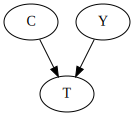

In [28]:
fd0 = StructuralCausalModel({
    "C": lambda n_samples: np.random.binomial(n=1, p=0.4, size=n_samples),
    "Y": lambda n_samples: np.random.binomial(n=1, p=0.8, size=n_samples),
    "T": discrete_model(["Y", "C"], {
        (0, 0): (0.1, 0.9), 
        (0, 1): (0.4, 0.6),
        (1, 0): (0.6, 0.4), 
        (1, 1): (0.9, 0.1),
    }),
})

fd0.cgm.draw()

In [29]:
data_df = fd0.sample(n_samples=1000000)
data_df.head()

,C,Y,T
0,1,1,0.0
1,0,1,0.0
2,0,1,1.0
3,1,1,0.0
4,0,1,1.0


### with conditioning

$P(X_1, X_3 | X_2) = P(X_1 | X_2) * P(X_3 | X_2)$

$X_1 = C, X_2 = T, X_3 = T$

$P(C, Y | T) = P(C | T) * P(Y | T)$

In [30]:
probs = {}
# i --> C, 0
# j --> T, 1
# k --> Y, 2

## calculate probabilites for all possible combinations
for i, j, k in itertools.product([0,1], [0,1], [0,1]):
  probs["P_C_{0}_Y_{2}_cond_T_{1}".format(i, j, k)] = len(data_df[(data_df['C'] == i) & (data_df['Y'] == k) & (data_df['T'] == j) ])/ len(data_df[(data_df['T'] == j)])
  probs["p_C_{0}_cond_T_{1}".format(i, j)] = len(data_df[(data_df['T'] == j) & (data_df['C'] == i)]) / len(data_df[data_df['T'] == j])
  probs["p_Y_{1}_cond_T_{0}".format(j, k)] = len(data_df[(data_df['Y'] == k) & (data_df['T'] == j)]) / len(data_df[data_df['T'] == j])

## report values and verify equality

for i, j, k in itertools.product([0,1], [0,1], [0,1]):
  print("(C, T, Y) = ({0}, {1}, {2})".format(i, j, k))
  idx1 = "P_C_{0}_Y_{2}_cond_T_{1}".format(i, j, k)
  idx2 = "p_C_{0}_cond_T_{1}".format(i, j)
  idx3 = "p_Y_{1}_cond_T_{0}".format(j, k)
  print('P(C = {0}, Y = {2} | T = {1}) = {3}'.format(i, j, k, probs[idx1]))
  print('P(C = {0} | T = {1}) = {2}'.format(i, j, probs[idx2]))
  print('P(Y = {1} | T = {0}) = {2}'.format(j, k, probs[idx3]))
  print("P(C = {0} | T = {1}) * P(Y = {2} | T = {1}) = {3}".format(i, j, k, probs[idx2] * probs[idx3]))
  print("Equality Holds: {0}".format(math.isclose(probs[idx1], probs[idx2] * probs[idx3], rel_tol=1e-2)))
  print("\n")

(C, T, Y) = (0, 0, 0)
P(C = 0, Y = 0 | T = 0) = 0.019702803270616912
P(C = 0 | T = 0) = 0.4836364223389915
P(Y = 0 | T = 0) = 0.07175662477500383
P(C = 0 | T = 0) * P(Y = 0 | T = 0) = 0.034704117285304294
Equality Holds: False


(C, T, Y) = (0, 0, 1)
P(C = 0, Y = 1 | T = 0) = 0.4639336190683746
P(C = 0 | T = 0) = 0.4836364223389915
P(Y = 1 | T = 0) = 0.9282433752249961
P(C = 0 | T = 0) * P(Y = 1 | T = 0) = 0.4489323050536872
Equality Holds: False


(C, T, Y) = (0, 1, 0)
P(C = 0, Y = 0 | T = 1) = 0.28412671300371833
P(C = 0 | T = 1) = 0.7892417453914781
P(Y = 0 | T = 1) = 0.410245831636206
P(C = 0 | T = 1) * P(Y = 0 | T = 1) = 0.32378313620013766
Equality Holds: False


(C, T, Y) = (0, 1, 1)
P(C = 0, Y = 1 | T = 1) = 0.5051150323877597
P(C = 0 | T = 1) = 0.7892417453914781
P(Y = 1 | T = 1) = 0.589754168363794
P(C = 0 | T = 1) * P(Y = 1 | T = 1) = 0.4654586091913404
Equality Holds: False


(C, T, Y) = (1, 0, 0)
P(C = 1, Y = 0 | T = 0) = 0.05205382150438692
P(C = 1 | T = 0) = 0.5163635776

### without conditioning

$P(X_1, X_3) = P(X_1) * P(X_3)$

$X_1 = C, X_2 = T, X_3 = Y$

$P(C, Y) = P(C) * P(Y)$ 

In [31]:
probs = {}
# i --> C, 0
# j --> T, 1
# k --> Y, 2

## calculate probabilites for all possible combinations
for i, k in itertools.product([0,1], [0,1]):
  probs["P_C_{0}_Y_{1}".format(i, k, k)] = len(data_df[(data_df['C'] == i) & (data_df['Y'] == k)]) / len(data_df)
  probs["p_C_{0}".format(i)] = len(data_df[(data_df['C'] == i)]) / len(data_df)
  probs["p_Y_{0}".format(k)] = len(data_df[(data_df['Y'] == k)]) / len(data_df)

## report values and verify equality
for i, k in itertools.product([0,1], [0,1]):
  print("(C , Y) = ({0}, {1})".format(i, k))
  idx1 = "P_C_{0}_Y_{1}".format(i , k)
  idx2 = "p_C_{0}".format(i)
  idx3 = "p_Y_{0}".format(k)
  print('P(C = {0}, Y = {1}) = {2}'.format(i, k, probs[idx1]))
  print('P(C = {0}) = {1}'.format(i, probs[idx2]))
  print('P(Y = {0}) = {1}'.format(k, probs[idx3]))
  print("P(C = {0}) * P(Y = {1}) = {2}".format(i, k, probs[idx2] * probs[idx3]))
  print("Equality Holds: {0}".format(math.isclose(probs[idx1], probs[idx2] * probs[idx3], rel_tol=1e-2)))
  print("\n")

(C , Y) = (0, 0)
P(C = 0, Y = 0) = 0.120328
P(C = 0) = 0.599933
P(Y = 0) = 0.200567
P(C = 0) * P(Y = 0) = 0.12032676201100001
Equality Holds: True


(C , Y) = (0, 1)
P(C = 0, Y = 1) = 0.479605
P(C = 0) = 0.599933
P(Y = 1) = 0.799433
P(C = 0) * P(Y = 1) = 0.479606237989
Equality Holds: True


(C , Y) = (1, 0)
P(C = 1, Y = 0) = 0.080239
P(C = 1) = 0.400067
P(Y = 0) = 0.200567
P(C = 1) * P(Y = 0) = 0.080240237989
Equality Holds: True


(C , Y) = (1, 1)
P(C = 1, Y = 1) = 0.319828
P(C = 1) = 0.400067
P(Y = 1) = 0.799433
P(C = 1) * P(Y = 1) = 0.31982676201099997
Equality Holds: True




Only in inverted fork, independence of $X_1$ and $X_3$ holds without conditioning on $X_2$.

Wtihout conditioning, the equality doesn't hold

### Test conditioning on the child of a collider

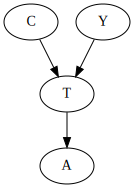

In [32]:
fd0 = StructuralCausalModel({
    "C": lambda n_samples: np.random.binomial(n=1, p=0.4, size=n_samples),
    "Y": lambda n_samples: np.random.binomial(n=1, p=0.8, size=n_samples),
    "T": discrete_model(["Y", "C"], {
        (0, 0): (0.1, 0.9), 
        (0, 1): (0.4, 0.6),
        (1, 0): (0.6, 0.4), 
        (1, 1): (0.9, 0.1),
    }),
    "A": discrete_model(["T"], {(0,): (0.1,0.9), (1,): (0.9,0.1)}),
})

fd0.cgm.draw()

In [33]:
data_df = fd0.sample(n_samples=1000000)
data_df.head()

,C,Y,T,A
0,0,0,1.0,0.0
1,0,1,0.0,0.0
2,0,0,1.0,0.0
3,1,1,0.0,1.0
4,1,1,0.0,1.0


### with conditioning

$P(X_1, X_3 | X_2) = P(X_1 | X_2) * P(X_3 | X_2)$

$X_1 = C, X_2 = T, X_3 = T$

$P(C, Y | T) = P(C | T) * P(Y | T)$

In [34]:
probs = {}
# i --> C, 0
# j --> T, 1
# k --> Y, 2

## calculate probabilites for all possible combinations
for i, j, k in itertools.product([0,1], [0,1], [0,1]):
  probs["P_C_{0}_Y_{2}_cond_T_{1}".format(i, j, k)] = len(data_df[(data_df['C'] == i) & (data_df['Y'] == k) & (data_df['T'] == j) ])/ len(data_df[(data_df['T'] == j)])
  probs["p_C_{0}_cond_T_{1}".format(i, j)] = len(data_df[(data_df['T'] == j) & (data_df['C'] == i)]) / len(data_df[data_df['T'] == j])
  probs["p_Y_{1}_cond_T_{0}".format(j, k)] = len(data_df[(data_df['Y'] == k) & (data_df['T'] == j)]) / len(data_df[data_df['T'] == j])

## report values and verify equality

for i, j, k in itertools.product([0,1], [0,1], [0,1]):
  print("(C, T, Y) = ({0}, {1}, {2})".format(i, j, k))
  idx1 = "P_C_{0}_Y_{2}_cond_T_{1}".format(i, j, k)
  idx2 = "p_C_{0}_cond_T_{1}".format(i, j)
  idx3 = "p_Y_{1}_cond_T_{0}".format(j, k)
  print('P(C = {0}, Y = {2} | T = {1}) = {3}'.format(i, j, k, probs[idx1]))
  print('P(C = {0} | T = {1}) = {2}'.format(i, j, probs[idx2]))
  print('P(Y = {1} | T = {0}) = {2}'.format(j, k, probs[idx3]))
  print("P(C = {0} | T = {1}) * P(Y = {2} | T = {1}) = {3}".format(i, j, k, probs[idx2] * probs[idx3]))
  print("Equality Holds: {0}".format(math.isclose(probs[idx1], probs[idx2] * probs[idx3], rel_tol=1e-2)))
  print("\n")

(C, T, Y) = (0, 0, 0)
P(C = 0, Y = 0 | T = 0) = 0.019383025544709286
P(C = 0 | T = 0) = 0.4837357021369209
P(Y = 0 | T = 0) = 0.07141072249046809
P(C = 0 | T = 0) * P(Y = 0 | T = 0) = 0.03454391598403139
Equality Holds: False


(C, T, Y) = (0, 0, 1)
P(C = 0, Y = 1 | T = 0) = 0.46435267659221163
P(C = 0 | T = 0) = 0.4837357021369209
P(Y = 1 | T = 0) = 0.9285892775095319
P(C = 0 | T = 0) * P(Y = 1 | T = 0) = 0.4491917861528895
Equality Holds: False


(C, T, Y) = (0, 1, 0)
P(C = 0, Y = 0 | T = 1) = 0.2844659810647459
P(C = 0 | T = 1) = 0.789829214015775
P(Y = 0 | T = 1) = 0.41007334448204574
P(C = 0 | T = 1) * P(Y = 0 | T = 1) = 0.3238879073610743
Equality Holds: False


(C, T, Y) = (0, 1, 1)
P(C = 0, Y = 1 | T = 1) = 0.505363232951029
P(C = 0 | T = 1) = 0.789829214015775
P(Y = 1 | T = 1) = 0.5899266555179542
P(C = 0 | T = 1) * P(Y = 1 | T = 1) = 0.4659413066547006
Equality Holds: False


(C, T, Y) = (1, 0, 0)
P(C = 1, Y = 0 | T = 0) = 0.0520276969457588
P(C = 1 | T = 0) = 0.5162642978630

### without conditioning

$P(X_1, X_3) = P(X_1) * P(X_3)$

$X_1 = C, X_2 = T, X_3 = Y$

$P(C, Y) = P(C) * P(Y)$ 

In [35]:
probs = {}
# i --> C, 0
# j --> T, 1
# k --> Y, 2

## calculate probabilites for all possible combinations
for i, k in itertools.product([0,1], [0,1]):
  probs["P_C_{0}_Y_{1}".format(i, k, k)] = len(data_df[(data_df['C'] == i) & (data_df['Y'] == k)]) / len(data_df)
  probs["p_C_{0}".format(i)] = len(data_df[(data_df['C'] == i)]) / len(data_df)
  probs["p_Y_{0}".format(k)] = len(data_df[(data_df['Y'] == k)]) / len(data_df)

## report values and verify equality
for i, k in itertools.product([0,1], [0,1]):
  print("(C , Y) = ({0}, {1})".format(i, k))
  idx1 = "P_C_{0}_Y_{1}".format(i , k)
  idx2 = "p_C_{0}".format(i)
  idx3 = "p_Y_{0}".format(k)
  print('P(C = {0}, Y = {1}) = {2}'.format(i, k, probs[idx1]))
  print('P(C = {0}) = {1}'.format(i, probs[idx2]))
  print('P(Y = {0}) = {1}'.format(k, probs[idx3]))
  print("P(C = {0}) * P(Y = {1}) = {2}".format(i, k, probs[idx2] * probs[idx3]))
  print("Equality Holds: {0}".format(math.isclose(probs[idx1], probs[idx2] * probs[idx3], rel_tol=1e-2)))
  print("\n")

(C , Y) = (0, 0)
P(C = 0, Y = 0) = 0.120039
P(C = 0) = 0.599964
P(Y = 0) = 0.200006
P(C = 0) * P(Y = 0) = 0.11999639978400001
Equality Holds: True


(C , Y) = (0, 1)
P(C = 0, Y = 1) = 0.479925
P(C = 0) = 0.599964
P(Y = 1) = 0.799994
P(C = 0) * P(Y = 1) = 0.47996760021600005
Equality Holds: True


(C , Y) = (1, 0)
P(C = 1, Y = 0) = 0.079967
P(C = 1) = 0.400036
P(Y = 0) = 0.200006
P(C = 1) * P(Y = 0) = 0.080009600216
Equality Holds: True


(C , Y) = (1, 1)
P(C = 1, Y = 1) = 0.320069
P(C = 1) = 0.400036
P(Y = 1) = 0.799994
P(C = 1) * P(Y = 1) = 0.320026399784
Equality Holds: True




Only in inverted fork, independence of $X_1$ and $X_3$ holds without conditioning on $X_2$.